In [1]:
from Model.DCVAE import DCVAE,DCVAE_Norm,DCVAE_NormV2
from Model.Utils import LoadMPS45,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np
%matplotlib notebook

Using TensorFlow backend.


# Load DataSet

In [2]:
x_train1,x_test1=LoadMPS45(dirBase='DataSet/MPS-45.mat',AllTrain=True);
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)

# Create Convolutional Variational Autoencoder

In [3]:
model = DCVAE_Norm(input_shape=(45, 45, 2),filters=[32,32,32],strides=[2,2,2],KernelDim=(5,5,5),hidden_dim=1024,
               latent_dim=500,opt=RMSprop(lr=0.001),dropout=0.0)

# Training Network

In [4]:
model.fit(x_train, num_epochs=1000,batch_size=256,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 23, 23, 32)   1632        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 23, 23, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 23, 23, 32)   0           batch_normalization_1[0][0]      
_________________________________________________________________________________________


Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.0003200000210199505.



Epoch 00076: ReduceLROnPlateau reducing learning rate to 0.0001280000142287463.



Epoch 00096: ReduceLROnPlateau reducing learning rate to 5.1200004236306995e-05.



Epoch 00113: ReduceLROnPlateau reducing learning rate to 2.0480001694522798e-05.



Epoch 00118: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.



# Ploting Train History

val_loss   :  [227.29293383789062, 227.58194555664062, 227.8880401204427, 227.69924780273436]
loss   :  [215.8034404613636, 215.73904433442974, 215.74151438500735, 215.65244482159392]


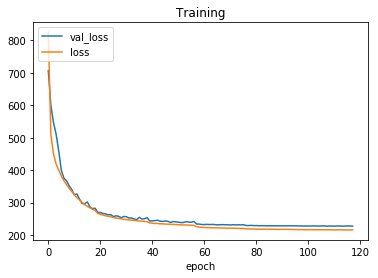

In [5]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

val_acc_pred   :  [0.9675372017224629, 0.9674697143236796, 0.9674167873064677, 0.9674014824231466]
acc_pred   :  [0.9697381908552704, 0.96974407893576, 0.9697602701126529, 0.9697690623702817]


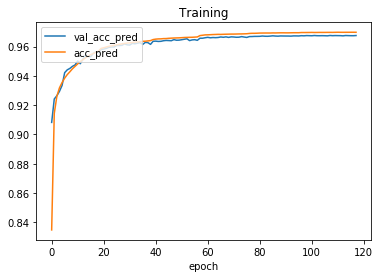

In [6]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

lr   :  [2.0480002e-05, 2.0480002e-05, 2.0480002e-05, 2.0480002e-05]


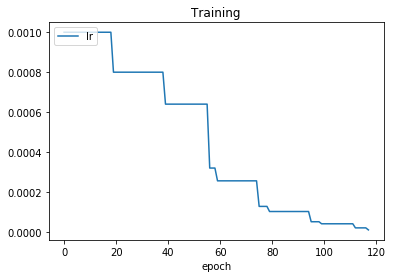

In [7]:
PlotHistory(model.history.history,listKeys=['lr'])

# Evaluate Model with Test dataset 

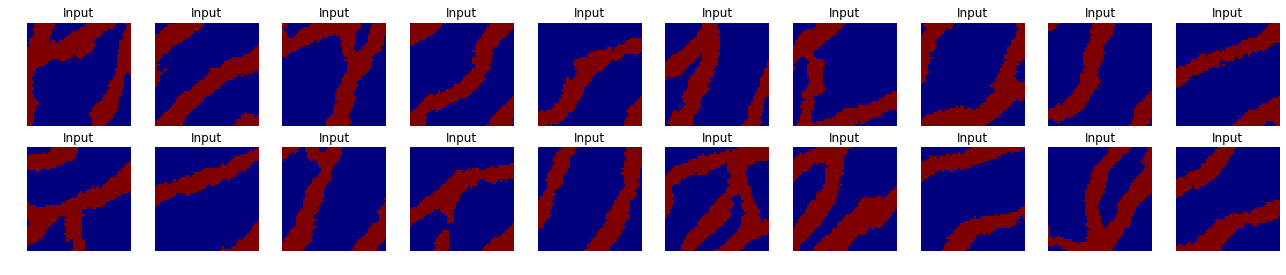

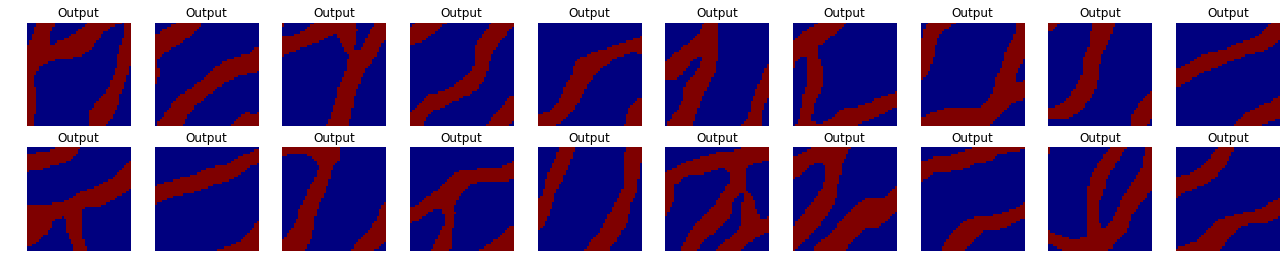

In [8]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=45)

# Generate random sampling

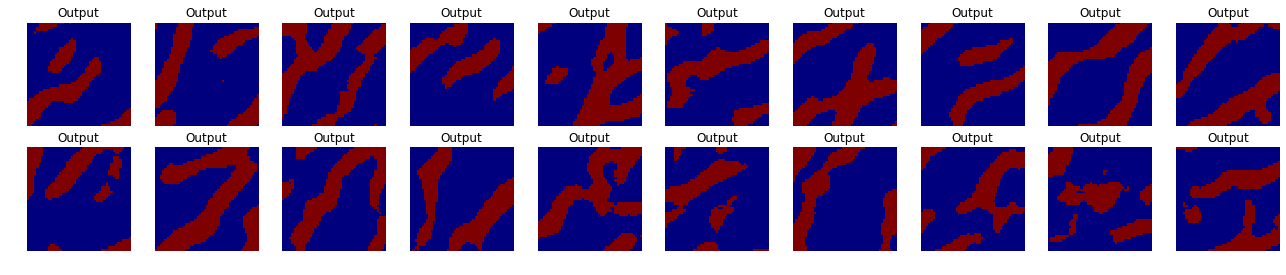

In [9]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=45,Only_Result=False)